![Alt text: Logo da Zoop](https://github.com/alura-cursos/python-analise-chatgpt-assistente/blob/main/Logos%20e%20paleta%20-%20ZOOP/Logo%20fundo%20colorido%20(2).png?raw=true)

In [1]:
url = 'https://github.com/alura-cursos/python-analise-chatgpt-assistente/raw/main/Dados/dados_vendas.json'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_json(url)
df.head()

,item_identificador,loja_identificador,vendas_totais,item,loja
0,FDB08,OUT018,176503.58,"{'item_peso': 6.055, 'item_conteudo_gordura': ...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."
1,DRQ35,OUT049,185758.20,"{'item_peso': 9.3, 'item_conteudo_gordura': 'B...","{'loja_ano_estabelecimento': 2009, 'loja_taman..."
2,FDD14,OUT018,165983.94,"{'item_peso': 20.7, 'item_conteudo_gordura': '...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."
3,FDY37,OUT045,314923.40,"{'item_peso': 17.0, 'item_conteudo_gordura': '...","{'loja_ano_estabelecimento': 2012, 'loja_taman..."
4,FDY59,OUT018,64782.34,"{'item_peso': 8.195, 'item_conteudo_gordura': ...","{'loja_ano_estabelecimento': 2019, 'loja_taman..."


As colunas "item" e "loja" contêm dicionários aninhados dentro de cada uma das linhas.
Vamos transformar os dados dos dicionários em colunas.

In [4]:
from pandas import json_normalize

# Normalizando os dados do dicionário na coluna "item"
df_item = json_normalize(df['item'])

# Normalizando os dados do dicionário na coluna "loja"
df_loja = json_normalize(df['loja'])

# Combinando os DataFrames normalizados com o DataFrame original
df = pd.concat([df, df_item, df_loja], axis=1)

# Removendo as colunas originais com dicionários
df.drop(['item', 'loja'], axis=1, inplace=True)

# Visualizando o DataFrame resultante
df

,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,FDY08,OUT010,28096.76,9.395,Regular,0.286345,Frutas e Vegetais,139.18,None,2008,None,Nível 3,Mercado
8546,FDC41,OUT017,130163.90,15.600,Baixo Teor de Gordura,0.117575,Alimentos Congelados,75.67,None,2017,None,Nível 2,Supermercado Tipo 1
8547,NCQ53,OUT045,614533.40,17.600,Baixo Teor de Gordura,0.018944,Mercearia,237.36,None,2012,None,Nível 2,Supermercado Tipo 1
8548,FDL46,OUT017,164985.24,20.350,baixo teor de gordura,0.054363,Lanches,117.95,None,2017,None,Nível 2,Supermercado Tipo 1


# Exploração dos dados

In [5]:
# Verificando as primeiras linhas do DataFrame
df.head()

,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2


In [6]:
# Verificando estatísticas descritivas das colunas numéricas
df.describe()

,vendas_totais,item_peso,item_visibilidade,item_preco,loja_ano_estabelecimento
count,8.550000e+03,7081.000000,8550.000000,8550.000000,8550.000000
mean,2.181949e+05,12.855023,0.066150,141.007453,2007.830409
std,1.708098e+05,4.643508,0.051578,62.333062,8.372541
min,3.329000e+03,4.555000,0.000000,31.290000,1995.000000
25%,8.349132e+04,8.770000,0.027024,93.787500,1997.000000
50%,1.794331e+05,12.600000,0.053978,142.935000,2009.000000
75%,3.100963e+05,16.850000,0.094646,185.760000,2014.000000
max,1.308696e+06,21.350000,0.328391,266.890000,2019.000000


Observe que a coluna item_quantidade_venda está vazia

In [7]:
# Verificando as informações gerais do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   item_identificador        8550 non-null   object 
 1   loja_identificador        8550 non-null   object 
 2   vendas_totais             8550 non-null   float64
 3   item_peso                 7081 non-null   float64
 4   item_conteudo_gordura     8550 non-null   object 
 5   item_visibilidade         8550 non-null   float64
 6   item_tipo                 8550 non-null   object 
 7   item_preco                8550 non-null   float64
 8   item_quantidade_venda     0 non-null      object 
 9   loja_ano_estabelecimento  8550 non-null   int64  
 10  loja_tamanho              6133 non-null   object 
 11  loja_tipo_localizacao     8550 non-null   object 
 12  loja_tipo                 8550 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 868.5+ KB


A coluna Conteudo_gordura deveria ter somente dois valores

In [8]:
# Verificar a contagem de valores únicos em cada coluna
df.nunique()

item_identificador          1559
loja_identificador            10
vendas_totais               3493
item_peso                    415
item_conteudo_gordura          5
item_visibilidade           7880
item_tipo                     16
item_preco                  4839
item_quantidade_venda          0
loja_ano_estabelecimento       9
loja_tamanho                   3
loja_tipo_localizacao          3
loja_tipo                      4
dtype: int64

In [9]:
# Verificando a presença de valores duplicados
df.duplicated().sum()

27

In [10]:
# Verificando a presença de valores nulos em cada coluna
df.isnull().sum()

item_identificador             0
loja_identificador             0
vendas_totais                  0
item_peso                   1469
item_conteudo_gordura          0
item_visibilidade              0
item_tipo                      0
item_preco                     0
item_quantidade_venda       8550
loja_ano_estabelecimento       0
loja_tamanho                2417
loja_tipo_localizacao          0
loja_tipo                      0
dtype: int64

In [11]:
# Verificando valores unicos da coluna
df['item_conteudo_gordura'].unique()

array(['Baixo Teor de Gordura', 'Regular', 'BTG', 'reg',
       'baixo teor de gordura'], dtype=object)

#Limpeza e tratamento

Durante a exploração do DataFrame "df", identificamos 27 linhas duplicadas.

Vamos remover estas linhas duplicadas.

In [12]:
# Removendo linhas duplicadas do DataFrame
df = df.drop_duplicates()
df

,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,item_quantidade_venda,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,None,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,None,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,None,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,None,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,None,2019,Médio,Nível 3,Supermercado Tipo 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,FDY08,OUT010,28096.76,9.395,Regular,0.286345,Frutas e Vegetais,139.18,None,2008,None,Nível 3,Mercado
8546,FDC41,OUT017,130163.90,15.600,Baixo Teor de Gordura,0.117575,Alimentos Congelados,75.67,None,2017,None,Nível 2,Supermercado Tipo 1
8547,NCQ53,OUT045,614533.40,17.600,Baixo Teor de Gordura,0.018944,Mercearia,237.36,None,2012,None,Nível 2,Supermercado Tipo 1
8548,FDL46,OUT017,164985.24,20.350,baixo teor de gordura,0.054363,Lanches,117.95,None,2017,None,Nível 2,Supermercado Tipo 1


Houve um grande número de vendas de itens durante o trimestre, e não há justificativa para a ausência de dados na coluna "item_quantidade_venda", o que a torna uma coluna dispensável.

In [13]:
# Descartando a coluna "item_quantidade_venda"
df = df.drop('item_quantidade_venda', axis=1)

A coluna "item_peso" contém valores do tipo float, representando o peso em gramas dos produtos.

In [14]:
media_peso = df['item_peso'].mean()  # Calcula a média da coluna
df['item_peso'] = df['item_peso'].fillna(media_peso)  # Preenche os valores nulos com a média
media_peso

12.857645184135977

A coluna "loja_tamanho" possui três categorias de tamanho para supermercados.

In [15]:
df['loja_tamanho'].fillna('Desconhecido', inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8549
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   item_identificador        8523 non-null   object 
 1   loja_identificador        8523 non-null   object 
 2   vendas_totais             8523 non-null   float64
 3   item_peso                 8523 non-null   float64
 4   item_conteudo_gordura     8523 non-null   object 
 5   item_visibilidade         8523 non-null   float64
 6   item_tipo                 8523 non-null   object 
 7   item_preco                8523 non-null   float64
 8   loja_ano_estabelecimento  8523 non-null   int64  
 9   loja_tamanho              8523 non-null   object 
 10  loja_tipo_localizacao     8523 non-null   object 
 11  loja_tipo                 8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


A coluna "item_conteudo_gordura" do DataFrame "df" apresenta 5 valores únicos dados por: 'Baixo Teor de Gordura', 'Regular', 'BTG', 'reg' e 'baixo teor de gordura'.

Deveriam ser somente 2 valores unicos 'Baixo Teor de Gordura' e 'Regular'

In [17]:
# Padronizando os valores da coluna "item_conteudo_gordura"
df['item_conteudo_gordura'] = df['item_conteudo_gordura'].replace({
    'BTG': 'Baixo Teor de Gordura',
    'reg': 'Regular',
    'baixo teor de gordura': 'Baixo Teor de Gordura'
})

# Verificando os valores únicos após a padronização
df['item_conteudo_gordura'].unique()

array(['Baixo Teor de Gordura', 'Regular'], dtype=object)

#Análise dos dados

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

Visualização do total obtido em vendas para as quatro categorias de tipo de loja.

In [19]:
print('De R$%s até R$%s reais' % (df.item_preco.min(), df.item_preco.max()))

De R$31.29 até R$266.89 reais


In [20]:
df.head()

,item_identificador,loja_identificador,vendas_totais,item_peso,item_conteudo_gordura,item_visibilidade,item_tipo,item_preco,loja_ano_estabelecimento,loja_tamanho,loja_tipo_localizacao,loja_tipo
0,FDB08,OUT018,176503.58,6.055,Baixo Teor de Gordura,0.031230,Frutas e Vegetais,160.36,2019,Médio,Nível 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Baixo Teor de Gordura,0.042357,Bebidas Alcoólicas,123.24,2009,Médio,Nível 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Baixo Teor de Gordura,0.170500,Enlatados,184.13,2019,Médio,Nível 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,2012,Desconhecido,Nível 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Baixo Teor de Gordura,0.000000,Confeitaria,93.15,2019,Médio,Nível 3,Supermercado Tipo 2


Valores máximos e mínimos por tipo de item

In [21]:
df.item_tipo.unique()

array(['Frutas e Vegetais', 'Bebidas Alcoólicas', 'Enlatados',
       'Confeitaria', 'Alimentos Congelados', 'Açougue', 'Cereais',
       'Mercearia', 'Bebidas Não Alcoólicas', 'Laticínios', 'Lanches',
       'Outros', 'Café da Manhã', 'Alimentos Ricos em Amido', 'Pães',
       'Frutos do Mar'], dtype=object)

In [22]:
# Encontrando o índice do item mais barato de cada tipo
idx_min = df.groupby('item_tipo')['item_preco'].idxmin()
df_min = df.loc[idx_min, ['item_tipo', 'item_preco']]
df_min.columns = ['item_tipo', 'preco_min']
df_min

,item_tipo,preco_min
4967,Alimentos Congelados,31.96
1496,Alimentos Ricos em Amido,34.05
4857,Açougue,34.75
7248,Bebidas Alcoólicas,34.25
6982,Bebidas Não Alcoólicas,31.29
8131,Café da Manhã,40.05
6995,Cereais,32.46
8015,Confeitaria,33.99
657,Enlatados,36.35
6673,Frutas e Vegetais,36.25


In [23]:
# Encontrando o índice do item mais caro de cada tipo
idx_max = df.groupby('item_tipo')['item_preco'].idxmax()
# Criando um novo DataFrame com os resultados
df_max = df.loc[idx_max, ['item_tipo', 'item_preco']]
# Renomeando as colunas para evitar conflito na concatenação
df_max.columns = ['item_tipo', 'preco_max']
df_max

,item_tipo,preco_max
3040,Alimentos Congelados,264.89
5456,Alimentos Ricos em Amido,263.03
2555,Açougue,261.59
119,Bebidas Alcoólicas,261.43
6816,Bebidas Não Alcoólicas,263.59
7478,Café da Manhã,234.93
7697,Cereais,264.79
15,Confeitaria,265.56
4146,Enlatados,266.89
2389,Frutas e Vegetais,264.23


Mediana de vendas

In [24]:
df.vendas_totais.quantile()

179433.1

Frequência de vendas por preço

In [25]:
# Criando uma classificação de preço
classes = [0, 50, 100, 200, 300, 400]
labels = ['Muito Barato','Barato','Regular','Caro','Muito Caro']

In [26]:
# Contagem de venda por classe
frequencia = pd.value_counts(pd.cut(x = df.item_preco,
       bins = classes,
       labels = labels,
       include_lowest = True))
frequencia

item_preco
Regular         4641
Barato          1683
Caro            1440
Muito Barato     759
Muito Caro         0
Name: count, dtype: int64

In [27]:
# Calcula o total de observações
obs = frequencia.sum()
# Calcula o percentual de cada categoria
percentual = (frequencia / obs) * 100
# Exibe os valores por percentual
percentual = percentual.apply(lambda x: f"{x:.2f}%")
print(percentual)

item_preco
Regular         54.45%
Barato          19.75%
Caro            16.90%
Muito Barato     8.91%
Muito Caro       0.00%
Name: count, dtype: object


Simetria de vendas totais

In [28]:
# Criando uma classificação de preço
cls = [0, 4000, 6000, 8000, 11000]
lbs = ['Venda baixa','Venda regular','Venda alta','Venda Muito alta']

In [29]:
# Contagem de venda por classe
freque = pd.value_counts(pd.cut(x = df.vendas_totais,
       bins = cls,
       labels = lbs,
       include_lowest = True))
freque

vendas_totais
Venda Muito alta    71
Venda regular       36
Venda alta          28
Venda baixa         17
Name: count, dtype: int64

In [30]:
# Calcula o total de observações
observacao = freque.sum()
# Calcula o percentual de cada categoria
percen = (freque / observacao) * 100
# Exibe os valores por percentual
percen = percen.apply(lambda x: f"{x:.2f}%")
print(percen)

vendas_totais
Venda Muito alta    46.71%
Venda regular       23.68%
Venda alta          18.42%
Venda baixa         11.18%
Name: count, dtype: object


<ipython-input-31-b5c46f63f047>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.query('vendas_totais < 11000').vendas_totais)


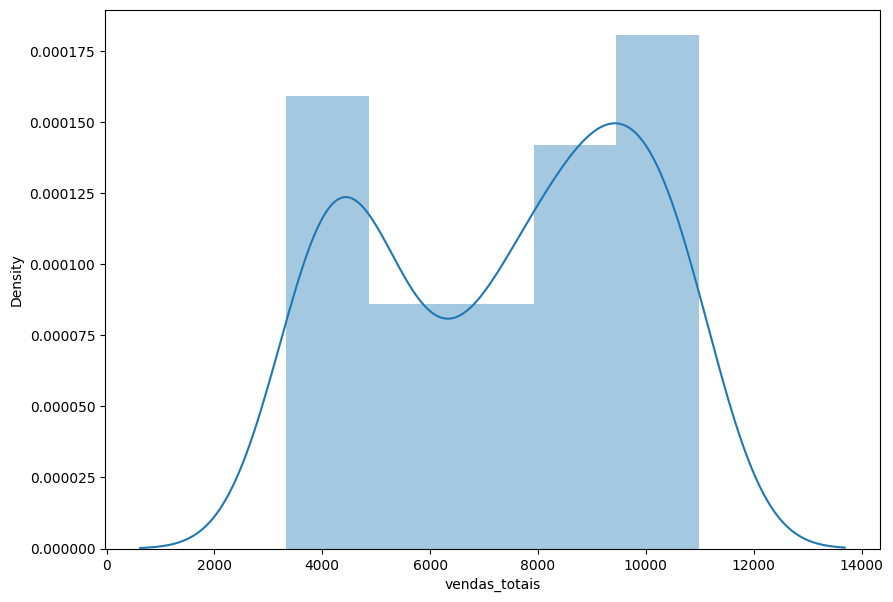

In [31]:
import seaborn as sns
ax = sns.distplot(df.query('vendas_totais < 11000').vendas_totais)
ax.figure.set_size_inches(10, 7)

O resultado é assimetrico a esquerda. O número de vendas é maior em valores mais altos, isso significa que há uma quantidade significativa de vendas ocorrendo em valores elevados em comparação com valores mais baixos. Isso pode indicar que os produtos de maior valor estão sendo mais vendidos do que os produtos de menor valor. Essa informação é importante para entender o comportamento de compra dos clientes e pode influenciar as estratégias de marketing e precificação.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

Visualização do total obtido em vendas para os dois tipos de conteúdo de gordura.

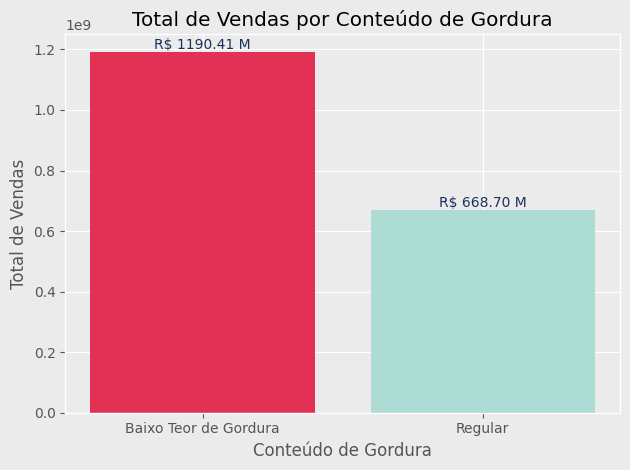

In [32]:
import matplotlib.pyplot as plt

# Agrupando os dados por conteúdo de gordura e somando as vendas totais
df_grouped = df.groupby('item_conteudo_gordura')['vendas_totais'].sum()

# Configurações de estilo
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.patch.set_facecolor('#ebebeb')
ax.set_facecolor('#ebebeb')

# Criando o gráfico de colunas
colors = ['#e23155', '#acdcd3']
bars = ax.bar(df_grouped.index, df_grouped.values, color=colors)

# Adicionando o total das vendas acima de cada coluna
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1000000, f'R$ {height/1000000:.2f} M',
            ha='center', va='bottom', color='#19325c')

# Configurações adicionais
plt.xlabel('Conteúdo de Gordura')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Conteúdo de Gordura')
plt.xticks(rotation=0)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

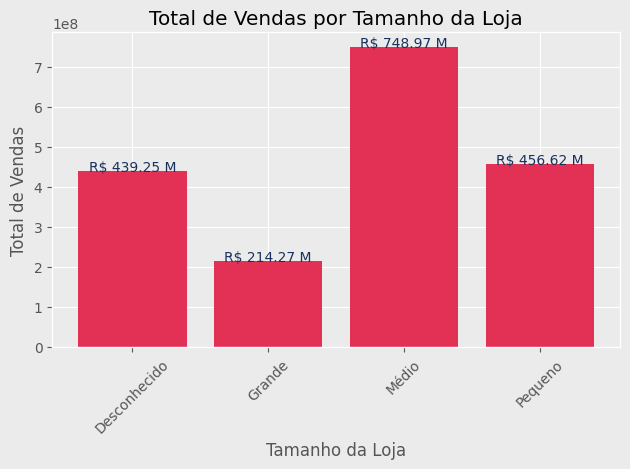

In [33]:
# Agrupando os dados por tamanho da loja e somando as vendas totais
df_grouped = df.groupby('loja_tamanho')['vendas_totais'].sum()

# Configurações de estilo
plt.style.use('ggplot')
colors = ['#e23155', '#e23155', '#e23155', '#e23155']
fig, ax = plt.subplots()
fig.patch.set_facecolor('#ebebeb')
ax.set_facecolor('#ebebeb')

# Criando o gráfico de barras
ax.bar(df_grouped.index, df_grouped.values, color=colors)

# Adicionando o total das vendas acima de cada coluna
for i, v in enumerate(df_grouped.values):
    ax.text(i, v + 1000000, f'R$ {v/1000000:.2f} M', color='#19325c', ha='center')

# Configurações adicionais
plt.xlabel('Tamanho da Loja')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Tamanho da Loja')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Visualização do total obtido em vendas para as quatro categorias de tamanho de loja.

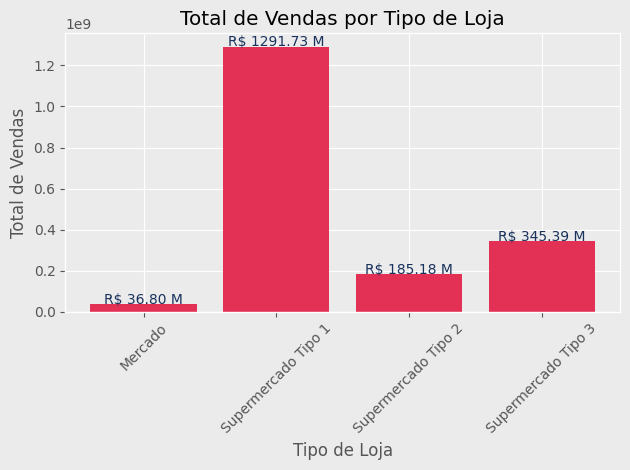

In [34]:
import matplotlib.pyplot as plt

# Agrupando os dados por tipo de loja e somando as vendas totais
df_grouped = df.groupby('loja_tipo')['vendas_totais'].sum()

# Configurações de estilo
plt.style.use('ggplot')
colors = ['#e23155', '#e23155', '#e23155', '#e23155']
fig, ax = plt.subplots()
fig.patch.set_facecolor('#ebebeb')
ax.set_facecolor('#ebebeb')

# Criando o gráfico de barras
ax.bar(df_grouped.index, df_grouped.values, color=colors)

# Adicionando o total das vendas acima de cada coluna
for i, v in enumerate(df_grouped.values):
    ax.text(i, v + 1000000, f'R$ {v/1000000:.2f} M', color='#19325c', ha='center')

# Configurações adicionais
plt.xlabel('Tipo de Loja')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Tipo de Loja')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()
